# Visualization of Global COVID-19 data

 #### In this project, Covid -19 pandemic data is analyzed to visualize the worst-hit countries in the world

# Project Plan

- Project Goal
- Gather data from reliable sources
- Dataset and features
- Clean and prepare the data.
- Data analysis: Visualize the worst-hit countries
- Total death and total confirmed cases for the country
- Plot them in the world map
- Model Prediction to forcase the future cases
- Conclusions

## Data Source
#### The data is taken from a repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE).
- Source:   https://github.com/CSSEGISandData/COVID-19

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import wget

- There are multiple source files in the CSSE git repository. The time evolutions and snapshots of global  Confirmed, Recovered and Deaths cases are explored in this analysis. The dataset consists of three csv files that are updated daily:
- time_series_19-covid-Confirmed_global.csv
- time_series_19-covid-Deaths_global.csv
- time_series_19-covid-Recovered_global.csv

In [2]:
! rm ./globaldata/time_series_covid19_confirmed_global.csv
! rm ./globaldata/time_series_covid19_deaths_global.csv
! rm ./globaldata/time_series_covid19_recovered_global.csv

! wget -O './globaldata/time_series_covid19_confirmed_global.csv' https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
! wget -O './globaldata/time_series_covid19_deaths_global.csv' https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
! wget -O './globaldata/time_series_covid19_recovered_global.csv' https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv  

--2020-05-11 15:04:30--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.52.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.52.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98844 (97K) [text/plain]
Saving to: ‘./globaldata/time_series_covid19_confirmed_global.csv’

./globaldata/time_s 100%[===================>]  96.53K  --.-KB/s    in 0.1s    

2020-05-11 15:04:30 (694 KB/s) - ‘./globaldata/time_series_covid19_confirmed_global.csv’ saved [98844/98844]

--2020-05-11 15:04:31--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.52.133
Connecting to raw.githubusercontent.com (raw.g

### Load the data downloaded from the git repository

In [3]:
conf_df = pd.read_csv('./globaldata/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('./globaldata/time_series_covid19_deaths_global.csv')
recov_df = pd.read_csv('./globaldata/time_series_covid19_recovered_global.csv')

### Explore the data features

Let's check data size/shape, missing values and data types of each columns.

In [4]:
print(f"Checking Size/Shape of the  data: ",conf_df.shape)
print(f"Checking null values:\n",conf_df.isnull().sum())
print(f"Checking Data-type of each column:\n",conf_df.dtypes)
print(f"Checking Size/Shape of the  data: ",deaths_df.shape)
print(f"Checking null values:\n",deaths_df.isnull().sum())
print(f"Checking Data-type of each column:\n",deaths_df.dtypes)
print(f"Checking Size/Shape of the  data: ",recov_df.shape)
print(f"Checking null values:\n",recov_df.isnull().sum())
print(f"Checking Data-type of each column:\n",recov_df.dtypes)

Checking Size/Shape of the  data:  (266, 114)
Checking null values:
 Province/State    184
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
5/6/20              0
5/7/20              0
5/8/20              0
5/9/20              0
5/10/20             0
Length: 114, dtype: int64
Checking Data-type of each column:
 Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
5/6/20              int64
5/7/20              int64
5/8/20              int64
5/9/20              int64
5/10/20             int64
Length: 114, dtype: object
Checking Size/Shape of the  data:  (266, 114)
Checking null values:
 Province/State    184
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
5/6/20              0
5/7/20              0
5/8/20              0
5/9/20              0
5/10/20             0
Len

In [5]:
print(f"Countries/Regions:{conf_df['Country/Region'].nunique()}")
print(f"Province/State:{conf_df['Province/State'].nunique()}")
#print(f"Countries/Regions:{conf_df['Country/Region'].unique()}")
#print(f"Province/State:{conf_df['Province/State'].unique()}")      

Countries/Regions:187
Province/State:82


Let's see what we have for one of them:

In [6]:
conf_df.head()
#deaths_df.head()
#recov_df.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  5/1/20  5/2/20  5/3/20  5/4/20  5/5/20  \
0        0        0        0  ...    2335    2469    2704    2894    3224   
1        0        0        0  ...     782     789     795     803     820   
2        0        0        0  ...    4154    4295    4474    4648    4838   
3        0        0        0  ...     745     747     748     750     751   
4        0        0        0  ...      30      35      35      35      36   

   5/6/20  5/7/20  5/8/20  5/9/20  5/10/20  
0    3392    3563    3778    4033     4402  
1     832     842     850     856      868  
2    4997    5182    5369    5558     5723  
3     751     752     752     754      755  
4      36      36      43      43       45  

[5 rows x 114 columns]

In [7]:
 conf_df.columns
#deaths_df.columns
#recov_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/1/20', '5/2/20', '5/3/20', '5/4/20', '5/5/20', '5/6/20', '5/7/20',
       '5/8/20', '5/9/20', '5/10/20'],
      dtype='object', length=114)

## Preprocessing of data

 ### We see that the data includes
 - Country/Region (object)
 - Province/State (object)
 - Latitude (float64)
 - Longitude (float64)
 - Date from column 4 to end (int64)
 

####  Although the data is nicely organized, it needs some more cleaning  to make it  more suitable for plotting. 

The first four column stored the physical location of COVID-19 cases but the column 4 to end  stored the number of cases, which is not practical for analysis and display. The more practical way is to have  one line per measurement.
The numbers of confirmed cases, deaths, and recovered patients are  stored in different dataframes. 

   - The first four column of the first data set includes: Country/Region (object), Province/State (object), Latitude (float64) and Longitude (float64)

In [8]:
df_id = conf_df.columns[0:4]

In [9]:
df_id

Index(['Province/State', 'Country/Region', 'Lat', 'Long'], dtype='object')

 - Column 4 to end of the first data set includes: Confirmed cases in different dataframses, I prefer to have them in a single dataframe.

In [10]:
df_dates = conf_df.columns[4:]

In [11]:
df_dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/1/20', '5/2/20', '5/3/20', '5/4/20', '5/5/20', '5/6/20', '5/7/20',
       '5/8/20', '5/9/20', '5/10/20'],
      dtype='object', length=110)

## Merging dataframes

- We can use the pandas melt function to reshape the dates in one column so that we can set it as index later, which makes it much easier for plotting.


In [12]:
global_conf_df = conf_df.melt(id_vars=df_id, value_vars=df_dates, var_name='Date', value_name='Confirmed')

In [13]:
global_conf_df.head(2)
#global_conf_df.info                                        

Province/State Country/Region      Lat     Long     Date  Confirmed
0            NaN    Afghanistan  33.0000  65.0000  1/22/20          0
1            NaN        Albania  41.1533  20.1683  1/22/20          0

- The second data set includes death cases,  we can use the pandas melt function to reshape the dates in one column so that we can set it as index later, which makes it much easier for plotting.

In [14]:
global_deaths_df = deaths_df.melt(id_vars=df_id, value_vars=df_dates, var_name='Date', value_name='Deaths')

In [15]:
global_deaths_df.head(2)
#global_deaths_dfths_df.info

Province/State Country/Region      Lat     Long     Date  Deaths
0            NaN    Afghanistan  33.0000  65.0000  1/22/20       0
1            NaN        Albania  41.1533  20.1683  1/22/20       0

- The third data set includes recovered cases, we can use the pandas melt function to reshape the dates in one column so that we can set it as index later, which makes it much easier for plotting.

In [16]:
global_recov_df = recov_df.melt(id_vars=df_id, value_vars=df_dates, var_name='Date', value_name='Recovered')

In [17]:
global_recov_df.head(2)
#global_recov_dfcov_df.info

Province/State Country/Region      Lat     Long     Date  Recovered
0            NaN    Afghanistan  33.0000  65.0000  1/22/20          0
1            NaN        Albania  41.1533  20.1683  1/22/20          0

In [18]:
#global_recov_df = global_recov_df[global_recov_df['Country/Region']!='Canada']

In [19]:
#global_recov_df

- Let's  use  pandas merge function to merge these three different data sets, which makes it much easier for plotting

In [20]:
global_df = pd.merge(left=global_conf_df, right=global_deaths_df, how='left',
                      on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long'])
global_df = pd.merge(left=global_df, right=global_recov_df, how='left',
                      on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long'])

In [21]:
global_df.tail(2)

Province/State Country/Region        Lat       Long     Date  Confirmed  \
29258            NaN        Comoros -11.645500  43.333300  5/10/20         11   
29259            NaN     Tajikistan  38.861034  71.276093  5/10/20        612   

       Deaths  Recovered  
29258       1        0.0  
29259      20        0.0

- Let's check data size/shape, missing values and data types of each columns of combined data set.

In [22]:
print(f"Checking Size/Shape of the combined  data: ",global_df.shape)
print(f"Checking missing values of combined data :\n",global_df.isna().sum())
print(f"Checking Data-type of each column:\n",global_df.dtypes)

Checking Size/Shape of the combined  data:  (29260, 8)
Checking missing values of combined data :
 Province/State    20240
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered          1980
dtype: int64
Checking Data-type of each column:
 Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered         float64
dtype: object


### Let's explore these missing values

In [23]:
global_df[global_df['Deaths'].isna()]['Country/Region'].value_counts()
#global_df[global_df['Deaths'].isna()]['Date'].value_counts()

Series([], Name: Country/Region, dtype: int64)

In [24]:
global_df[global_df['Recovered'].isna()]['Country/Region'].value_counts()
#global_df[global_df['Recovered'].isna()]['Date'].value_counts()

Canada         1650
Timor-Leste     110
Mozambique      110
Syria           110
Name: Country/Region, dtype: int64

In [25]:
global_df['Recovered'] = global_df['Recovered'].fillna(0)
global_df['Recovered'] = global_df['Recovered'].astype('int')
global_df.isna().sum()
#print(f"Checking missing values of combined data :\n",global_df.isna().sum())

Province/State    20240
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [26]:
global_df['Deaths'] = global_df['Deaths'].fillna(0)
global_df['Deaths'] = global_df['Deaths'].astype('int')
global_df.isna().sum()
#print(f"Checking missing values of combined data :\n",global_df.isna().sum())

Province/State    20240
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [27]:
 global_df.head(2)

Province/State Country/Region      Lat     Long     Date  Confirmed  Deaths  \
0            NaN    Afghanistan  33.0000  65.0000  1/22/20          0       0   
1            NaN        Albania  41.1533  20.1683  1/22/20          0       0   

   Recovered  
0          0  
1          0

## Global COVID-19 Data

- Let's save this combined data to a csv file, and avoid printing the idex to csv.

In [28]:
! rm ./globaldata/global_covid_data.csv
global_df.to_csv('./globaldata/global_covid_data.csv', index=False)

- We can use pandas parse_dates to parse 'Date' column as datetime.

In [29]:
df = pd.read_csv('./globaldata/global_covid_data.csv',  parse_dates=['Date'])
#df.sample(5)
df.head(2)

Province/State Country/Region      Lat     Long       Date  Confirmed  \
0            NaN    Afghanistan  33.0000  65.0000 2020-01-22          0   
1            NaN        Albania  41.1533  20.1683 2020-01-22          0   

   Deaths  Recovered  
0       0          0  
1       0          0

In [30]:
print(f"Countries/Regions:{df['Country/Region'].nunique()}")
print(f"Province/State:{df['Province/State'].nunique()}")

Countries/Regions:187
Province/State:82


- Let's create a data column of Active Cases subtracting total number of  Deaths and recovered cases 

In [31]:
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']

In [32]:
df.tail(2)

Province/State Country/Region        Lat       Long       Date  \
29258            NaN        Comoros -11.645500  43.333300 2020-05-10   
29259            NaN     Tajikistan  38.861034  71.276093 2020-05-10   

       Confirmed  Deaths  Recovered  Active  
29258         11       1          0      10  
29259        612      20          0     592

- Lets remove  NAN values  from Province/State column

In [33]:
df[['Province/State']] = df[['Province/State']].fillna('')
df[['Confirmed', 'Deaths', 'Recovered', 'Active']] = df[['Confirmed', 'Deaths', 'Recovered', 'Active']].fillna(0)


In [34]:
df.head(2)

Province/State Country/Region      Lat     Long       Date  Confirmed  \
0                   Afghanistan  33.0000  65.0000 2020-01-22          0   
1                       Albania  41.1533  20.1683 2020-01-22          0   

   Deaths  Recovered  Active  
0       0          0       0  
1       0          0       0

In [35]:
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [36]:
df1 = df.groupby('Date')['Confirmed', 'Deaths', 'Active'].sum().reset_index()
#df1

<ipython-input-36-7106fafec8fa>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [38]:
fig = px.line(df1, x="Date", y="Deaths",
                color_discrete_sequence=px.colors.qualitative.Vivid)
fig.for_each_trace(
    lambda trace: trace.update(name=trace.name.replace("=", ": ")),
)
fig.update_layout(
    title=" Total number of deaths due to COVID 19 ",
    xaxis_title="Date",
    yaxis_title="Number of Deaths",
)

fig.show()

In [39]:
dfc = df.groupby(['Country/Region','Province/State','Date'])['Confirmed'].sum() \
                          .groupby(['Country/Region','Province/State']).max().sort_values() \
                          .groupby(['Country/Region']).sum().sort_values(ascending = False)

first10 = pd.DataFrame(dfc).head(10)
fig = px.bar(first10, x=first10.index, y='Confirmed', labels={'x':'Country'},
             color="Confirmed", color_continuous_scale=px.colors.diverging.BrBG)
fig.update_layout(title_text='Confirmed COVID-19 cases by country')
fig.show()


In [40]:
dfc = df.groupby(['Country/Region','Province/State','Date'])['Deaths'].sum() \
                          .groupby(['Country/Region','Province/State']).max().sort_values() \
                          .groupby(['Country/Region']).sum().sort_values(ascending = False)

first10 = pd.DataFrame(dfc).head(10)
fig = px.bar(first10, x=first10.index, y='Deaths', labels={'x':'Country'},
             color="Deaths", color_continuous_scale=px.colors.diverging.BrBG)
fig.update_layout(title_text=' COVID-19 death cases by country')
fig.show()


In [41]:
dfc = df.groupby(['Country/Region','Province/State','Date'])['Active'].sum() \
                          .groupby(['Country/Region','Province/State']).max().sort_values() \
                          .groupby(['Country/Region']).sum().sort_values(ascending = False)

first10 = pd.DataFrame(dfc).head(10)
fig = px.bar(first10, x=first10.index, y='Active', labels={'x':'Country'},
             color="Active", color_continuous_scale=px.colors.diverging.BrBG)
fig.update_layout(title_text='Active COVID-19 cases by country')
fig.show()


# COVID-19 Cases in China

In [42]:
fig = px.line(df[(df['Province/State']=="Hubei")]
              , x='Date', y = "Deaths"
              ,color = "Province/State", color_discrete_sequence=px.colors.qualitative.Dark24)
fig.update_layout(
    title=" Number of COVID-19  deaths in Hubei",
    xaxis_title="Date ",
    yaxis_title="Number of Deaths in Hubei",
)
fig.show()

In [43]:
fig = px.line(df[(df['Country/Region']=="China")]
              , x='Date', y = "Confirmed"
              ,color = "Province/State", color_discrete_sequence=px.colors.qualitative.Dark24)
fig.update_layout(
    title=" Number of COVID-19 Confirmed cases in China",
    xaxis_title="Date ",
    yaxis_title="Number of Confirmed Cases in China",
)
fig.show()

In [44]:
fig = px.line(df[(df['Country/Region']=="China")]
              , x='Date', y = "Deaths"
              ,color = "Province/State", color_discrete_sequence=px.colors.qualitative.Dark24)
fig.update_layout(
    title=" Number of COVID-19  deaths in China",
    xaxis_title="Date ",
    yaxis_title="Number of Deaths in China",
)
fig.show()

# COVID-19 Cases in Canada

In [45]:
fig = px.bar(df.loc[(df['Country/Region'] == 'Canada') 
                    &(df.Date >= '2020-03-10')].sort_values('Confirmed',ascending = False)
             ,x='Date', y='Confirmed', color="Province/State", color_continuous_scale=px.colors.diverging.BrBG)
fig.update_layout(title_text='Confirmed COVID-19 cases  in Canada')
fig.show()

In [46]:
fig = px.line(df[(df['Country/Region']=="Canada")]
              , x='Date', y = "Deaths", range_x=['2020-03-08','2020-05-10']
              ,color = "Province/State", color_discrete_sequence=px.colors.qualitative.Dark24)
fig.update_layout(
    title="COVID-19 deaths in Canada",
    xaxis_title="Date",
    yaxis_title="Deaths",
)
fig.show()

In [47]:
fig = px.line(df[(df['Country/Region']=="Canada")]
              , x='Date', y = "Confirmed", range_x=['2020-03-01','2020-05-10']
              ,color = "Province/State", color_discrete_sequence=px.colors.qualitative.Dark24)
fig.update_layout(
    title="Confirmed COVID-19  cases in Canada",
    xaxis_title="Date",
    yaxis_title="Confirmed Cases",
)
fig.show()

In [48]:
fig = px.line(df[(df['Province/State']!="Recovered")
                 &(df['Province/State']!="Grand Princess")
                 &(df['Province/State']!="Diamond Princess")
                 & (df["Country/Region"]=="Canada")]
             , x='Date', y = "Confirmed", range_x=['2020-03-01','2020-05-10'], 
             color = "Province/State", color_discrete_sequence=px.colors.qualitative.Dark24)
fig.update_layout(
    title="Confirmed COVID-19  cases in Canada",
    xaxis_title="Date",
    yaxis_title="Confirmed Cases",
)
fig.show()

In [49]:
fig = px.line(df[(df['Province/State']!="Recovered")
                 &(df['Province/State']!="Grand Princess")
                 &(df['Province/State']!="Diamond Princess")
                 & (df["Country/Region"]=="Canada")]
             , x='Date', y = "Deaths", range_x=['2020-03-01','2020-05-10'], 
             color = "Province/State", color_discrete_sequence=px.colors.qualitative.Dark24)
fig.update_layout(
    title=" COVID-19  death cases in Canada",
    xaxis_title="Date",
    yaxis_title="Death Cases",
)
fig.show()

In [50]:
def add_daily_measures(df):
    df.loc[0,'Daily Cases'] = df.loc[0,'Confirmed']
    df.loc[0,'Daily Deaths'] = df.loc[0,'Deaths']
    df.loc[0,'Daily Recovered'] = df.loc[0,'Recovered']
    for i in range(1,len(df)):
        df.loc[i,'Daily Cases'] = df.loc[i,'Confirmed'] - df.loc[i-1,'Confirmed']
        df.loc[i,'Daily Deaths'] = df.loc[i,'Deaths'] - df.loc[i-1,'Deaths']
        df.loc[i,'Daily Recovered'] = df.loc[i,'Recovered'] - df.loc[i-1,'Recovered']
    #Make the first row as 0 because we don't know the previous value
    df.loc[0,'Daily Cases'] = 0
    df.loc[0,'Daily Deaths'] = 0
    df.loc[0,'Daily Recovered'] = 0
    return df

In [51]:
df_ca = df.copy()
df_ca = df_ca[df_ca['Country/Region']=='Canada']
df_ca = df_ca.groupby('Date',as_index=False)['Confirmed','Deaths', 'Recovered'].sum()
df_ca = add_daily_measures(df_ca)
fig = go.Figure(data=[
    go.Bar(name='Total Cases in Canada', x=df_ca['Date'], y=df_ca['Daily Cases']),
    go.Bar(name=' Total Deaths in Canada', x=df_ca['Date'], y=df_ca['Daily Deaths']),
    go.Bar(name=' Total Recovered in Canada', x=df_ca['Date'], y=df_ca['Daily Recovered']),
])
fig.update_layout(barmode='overlay', title='Daily Confirmed, Death and Recovered cases(Canada)',
                 annotations=[dict(x='2020-03-17', y=800, xref="x", yref="y", 
                                   text="Federal Lockdown Imposed (17th March)", showarrow=True, arrowhead=1, ax=-60, ay=-90)])
fig.show()

<ipython-input-51-4bdfd1b4e74d>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [52]:
fig = px.line(df_ca, x='Date', y = "Confirmed", range_x=['2020-03-01','2020-05-10']
              , color_discrete_sequence=px.colors.qualitative.Dark24)
fig.update_layout(
    title="COVID-19 Confirmed cases in Canada",
    xaxis_title="Date",
    yaxis_title="Confirmed ",
)
fig.show()

In [53]:
fig = px.line(df_ca, x='Date', y = "Deaths", range_x=['2020-03-01','2020-05-10']
              , color_discrete_sequence=px.colors.qualitative.Dark24)
fig.update_layout(
    title="COVID-19 Death cases in Canada",
    xaxis_title="Date",
    yaxis_title="Deaths ",
)
fig.show()

In [55]:
fig = px.line(df_ca, x='Date', y = "Daily Deaths", range_x=['2020-03-01','2020-05-10']
              , color_discrete_sequence=px.colors.qualitative.Dark24)
fig.update_layout(
    title="COVID-19 daily deaths in Canada",
    xaxis_title="Date",
    yaxis_title="Deaths ",
)
fig.show()

In [56]:
fig = px.line(df_ca, x='Date', y = "Daily Cases", range_x=['2020-03-01','2020-05-10']
              , color_discrete_sequence=px.colors.qualitative.Dark24)
fig.update_layout(
    title="COVID-19 daily cases in Canada",
    xaxis_title="Date",
    yaxis_title="Confirmed ",
)
fig.show()

In [57]:
fig = go.Figure(data=[
    go.Scatter(name='COVID-19 Cases in Canada', x=df_ca['Date'], y=df_ca['Daily Cases']
               , line=dict(color='royalblue', width=4)),
    go.Scatter(name=' COVID-19 Deaths in Canada', x=df_ca['Date'], y=df_ca['Daily Deaths']
               ,line=dict(color='firebrick', width=4)),
])
fig.update_layout(barmode='overlay', title='Daily Confirmed and Death  cases (Canada)',
                 annotations=[dict(x='2020-03-17', y=800, xref="x", yref="y", 
                                   text="Federal Lockdown Imposed (17th March)", showarrow=True, arrowhead=1, ax=-180, ay=-100)])
fig.show()

In [58]:
fig = go.Figure(data=[
    go.Scatter(name='COVID-19 Mortality rate in Canada', x=df_ca['Date'], y=df_ca['Daily Deaths']/df_ca['Daily Cases']
               , line=dict(color='royalblue', width=4)),
    go.Scatter(name='COVID-19 Mo rate in Canada', x=df_ca['Date'], y=df_ca['Daily Recovered']/df_ca['Daily Cases']
               , line=dict(color='royalblue', width=4)),
])
fig.update_layout(barmode='overlay', title='Mortality Rate (Canada)')
fig.show()

# COVID-19 cases in US

In [59]:
df_us = df.copy()
df_us = df_us[df_us['Country/Region']=='US']
df_us = df_us.groupby('Date',as_index=False)['Confirmed','Deaths','Recovered'].sum()
df_us = add_daily_measures(df_us)
fig = go.Figure(data=[
    go.Bar(name='Total Cases in US', x=df_us['Date'], y=df_us['Daily Cases']),
    go.Bar(name=' Total Deaths in US', x=df_us['Date'], y=df_us['Daily Deaths']), 
    go.Bar(name=' Total Recovered in US', x=df_us['Date'], y=df_us['Daily Recovered']),
])
fig.update_layout(barmode='overlay', title='Daily Confirmed, Death and Recovered cases(US)',
                 annotations=[dict(x='2020-03-19', y=1407, xref="x", yref="y", 
                                   text="Lockdown Imposed(19th March)", showarrow=True, arrowhead=1, ax=-150, ay=-250)])
fig.show()

<ipython-input-59-47ede31baf79>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [60]:
fig = go.Figure(data=[
    go.Scatter(name='COVID-19 Cases in US', x=df_us['Date'], y=df_us['Daily Cases']
               , line=dict(color='royalblue', width=4)),
    go.Scatter(name=' COVID-19 Deaths in US', x=df_us['Date'], y=df_us['Daily Deaths']
               ,line=dict(color='firebrick', width=4)),
    go.Scatter(name=' COVID-19 Recovered in US', x=df_us['Date'], y=df_us['Daily Recovered']
               ,line=dict(color='green', width=4)),
])
fig.update_layout(barmode='overlay', title='Daily Confirmed, Death and Recovered  cases (US)',
                 annotations=[dict(x='2020-03-19', y=800, xref="x", yref="y", 
                                   text="Federal Lockdown Imposed (19th March)", showarrow=True, arrowhead=1, ax=-180, ay=-100)])
fig.show()

In [61]:
fig = go.Figure(data=[
    go.Scatter(name='COVID-19 Mortality rate in US', x=df_us['Date'], y=df_us['Daily Deaths']/df_us['Daily Cases']
               , line=dict(color='royalblue', width=4)),
    go.Scatter(name='COVID-19 Recovery rate in US', x=df_us['Date'], y=df_us['Daily Recovered']/df_us['Daily Cases']
               , line=dict(color='green', width=4)),
])
fig.update_layout(barmode='overlay', title='Mortality, and Recovery  Rates (US)')
fig.show()

In [62]:
fig = px.line(df[(df["Country/Region"]=="US")]
             , x="Date",y= 'Confirmed'
             , color_discrete_sequence=px.colors.qualitative.Dark24)
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="COVID-19 confirmed cases in  US",
    xaxis_title="Date",
    yaxis_title="COVID-19 confirmed ",
)
fig.show()

# COVID 19 cases in Italy

In [63]:
df_it = df.copy()
df_it = df_it[df_it['Country/Region']=='Italy']
df_it = df_it.groupby('Date',as_index=False)['Confirmed','Deaths','Recovered'].sum()
df_it = add_daily_measures(df_it)
fig = go.Figure(data=[
    go.Bar(name='Total Cases in Italy', x=df_it['Date'], y=df_it['Daily Cases']),
    go.Bar(name=' Total Deaths in Italy', x=df_it['Date'], y=df_it['Daily Deaths']),
    go.Bar(name=' Total Recovered in Italy', x=df_it['Date'], y=df_it['Daily Recovered']), 
])
fig.update_layout(barmode='overlay', title='Daily Confirmed, Death and Recovered cases (Italy)',
                 annotations=[dict(x='2020-03-11', y=1407, xref="x", yref="y", 
                                   text="Lockdown Imposed(11th March)", showarrow=True, arrowhead=1, ax=-150, ay=-250)])
fig.show()

<ipython-input-63-f87fc1725825>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [64]:
fig = px.line(df[(df['Country/Region']=="Italy")]
              , x='Date', y = "Deaths", range_x=['2020-03-01','2020-05-10']
              , color_discrete_sequence=px.colors.qualitative.Dark24)
fig.update_layout(
    title="COVID-19 Deaths in Italy",
    xaxis_title="Date",
    yaxis_title="Deaths ",
)
fig.show()

# CCOVID-19 Global Cases

In [65]:
df_world = df.copy()
df_world = df_world.groupby('Date',as_index=False)['Confirmed','Deaths', 'Recovered'].sum()
df_world = add_daily_measures(df_world)
fig = go.Figure(data=[
    go.Bar(name='Global Confirmed Cases', x=df_world['Date'], y=df_world['Daily Cases']),
    go.Bar(name='Global Death Cases', x=df_world['Date'], y=df_world['Daily Deaths']),
    go.Bar(name='Global Recovered Cases', x=df_world['Date'], y=df_world['Daily Recovered'])
])
# Change the bar mode
fig.update_layout(barmode='overlay', title='Global daily Confirmed, Death and Recovered cases')
fig.show()

<ipython-input-65-f2eb4c1d59b9>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [66]:
df_world = df.copy()
df_world = df_world.groupby('Date',as_index=False)['Confirmed','Deaths', 'Recovered'].sum()
df_world = add_daily_measures(df_world)
fig = go.Figure(data=[
    go.Scatter(name='Global Confirmed Cases', x=df_world['Date'], y=df_world['Daily Cases'], line=dict(color='royalblue', width=4)),
    go.Scatter(name='Global Death Cases', x=df_world['Date'], y=df_world['Daily Deaths'], line=dict(color='red', width=4)),
    go.Scatter(name='Global Recovered Cases', x=df_world['Date'], y=df_world['Daily Recovered'], line=dict(color='green', width=4))
])
# Change the bar mode
fig.update_layout(barmode='overlay', title='Global daily Confirmed, Death and Recovered cases')
fig.show()

<ipython-input-66-f695d34b336c>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



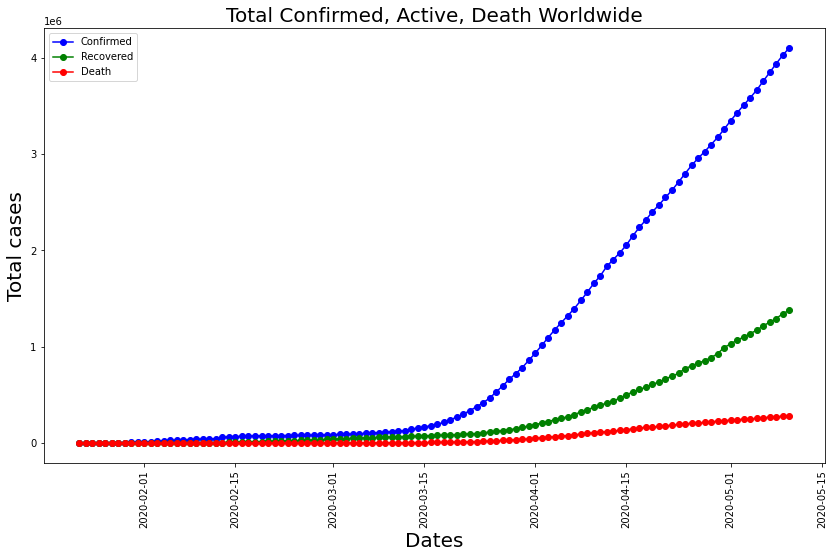

In [67]:
plt.figure(figsize= (14,8))
plt.xticks(rotation = 90 ,fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Active, Death Worldwide" , fontsize = 20)

ax1 = plt.plot_date(data=df_world,y= 'Confirmed',x= 'Date',label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = plt.plot_date(data=df_world,y= 'Recovered',x= 'Date',label = 'Recovered',linestyle ='-',color = 'g')
ax3 = plt.plot_date(data=df_world,y= 'Deaths',x= 'Date',label = 'Death',linestyle ='-',color = 'r')
plt.legend();

In [68]:
fig = px.line(df.nlargest(1200,'Deaths'), x='Date', y = "Deaths", 
             color = "Country/Region", color_discrete_sequence=px.colors.qualitative.Dark24)
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="Global COVID-19 Death cases",
    xaxis_title="Date",
    yaxis_title="COVID-19 Deaths",
)
fig.show()


In [69]:
fig = px.line(df.nlargest(200,'Deaths'), x='Date', y = "Deaths", log_y=True,
             color = "Country/Region", color_discrete_sequence=px.colors.qualitative.Dark24)
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="Global COVID-19 Death cases Log scale",
    xaxis_title="Date",
    yaxis_title="COVID-19 Deaths ",
)
fig.show()


In [70]:
fig = px.line(df.nlargest(1200,'Confirmed'), x='Date', y = "Confirmed", 
             color = "Country/Region", color_discrete_sequence=px.colors.qualitative.Dark24)
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="Global COVID-19 Confirmed cases",
    xaxis_title="Date",
    yaxis_title="COVID-19 Confirmed",
)
fig.show()

In [71]:
fig = px.line(df.nlargest(200,'Confirmed'), x='Date', y = "Confirmed", log_y=True,
             color = "Country/Region", color_discrete_sequence=px.colors.qualitative.Dark24)
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="Global COVID-19 Confirmed cases Log scale",
    xaxis_title="Date",
    yaxis_title="COVID-19 Confirmed  ",
)
fig.show()

In [72]:
df4 = df[df['Country/Region']!='China']
fig = px.line(df4.nlargest(1200,'Confirmed'), x='Date', y='Confirmed', 
              color = "Country/Region", range_x=['2020-02-23','2020-05-10'])
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="Global COVID-19 confirmed cases",
    xaxis_title="Year",
    yaxis_title="COVID-19 confirmed cases",
)
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [73]:
fig = px.line(df4.nlargest(200,'Confirmed'), x='Date', y='Confirmed',
              color = "Country/Region", range_x=['2020-02-20','2020-05-10'])
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="Global COVID-19 confirmed cases",
    xaxis_title="Year",
    yaxis_title="COVID-19 confirmed cases",
)
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [74]:
fig = px.scatter(df4.nlargest(1200,'Recovered'), x='Date', y='Recovered', 
                 color = "Country/Region", range_x=['2020-02-28','2020-05-10'])
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="Global COVID-19 Recovered cases",
    xaxis_title="Year",
    yaxis_title="COVID-19 Recovered cases",
)
fig.show()

In [75]:
fig = px.area(df4.nlargest(200,'Confirmed'), x='Date', y='Confirmed',log_y=True, 
              color = "Country/Region", range_x=['2020-02-28','2020-05-10'])
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="Global Covid19 confirmed cases, Log Scale ",
    xaxis_title="Year",
    yaxis_title="Covid19 confirmed cases",
)
fig.show()

In [76]:
fig = px.area(df4.nlargest(200,'Deaths'), x='Date', y='Deaths',log_y=True, 
              color = "Country/Region", range_x=['2020-02-28','2020-05-10'])
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="Global Covid19 Death cases, Log Scale ",
    xaxis_title="Year",
    yaxis_title="Covid19 Death cases",
)
fig.show()

In [77]:
import math
from plotly.subplots import make_subplots

In [78]:
gt_100 = df[df['Confirmed']>100000]['Country/Region'].unique()
temp = df[df['Country/Region'].isin(gt_100)]
temp = temp.groupby(['Country/Region', 'Date'])['Confirmed'].sum().reset_index()
temp = temp[temp['Confirmed']>100]
# print(temp.head())

min_date = temp.groupby('Country/Region')['Date'].min().reset_index()
min_date.columns = ['Country/Region', 'Min Date']
# print(min_date.head())

from_100th_case = pd.merge(temp, min_date, on='Country/Region')
from_100th_case['N days'] = (from_100th_case['Date'] - from_100th_case['Min Date']).dt.days
# print(from_100th_case.head())

fig = px.line(from_100th_case, x='N days', y='Confirmed', color='Country/Region', title='Number days from 100 case', height=600)
fig.show()

In [79]:
df

Province/State         Country/Region        Lat       Long       Date  \
0                               Afghanistan  33.000000  65.000000 2020-01-22   
1                                   Albania  41.153300  20.168300 2020-01-22   
2                                   Algeria  28.033900   1.659600 2020-01-22   
3                                   Andorra  42.506300   1.521800 2020-01-22   
4                                    Angola -11.202700  17.873900 2020-01-22   
...              ...                    ...        ...        ...        ...   
29255                        Western Sahara  24.215500 -12.885800 2020-05-10   
29256                 Sao Tome and Principe   0.186360   6.613081 2020-05-10   
29257                                 Yemen  15.552727  48.516388 2020-05-10   
29258                               Comoros -11.645500  43.333300 2020-05-10   
29259                            Tajikistan  38.861034  71.276093 2020-05-10   

       Confirmed  Deaths  Recovered  Active  
0              0       0          0       0  
1              0       0          0       0  
2              0       0          0       0  
3              0       0          0       0  
4              0       0          0       0  
...          ...     ...        ...     ...  
29255          6       0          5       1  
29256        208       5          4     199  
29257         51       8          1      42  
29258         11       1          0      10  
29259        612      20          0     592  

[29260 rows x 9 columns]

In [80]:
temp = df.groupby(['Country/Region', 'Date', ])['Confirmed', 'Deaths']
temp = temp.sum().diff().reset_index()

mask = temp['Country/Region'] != temp['Country/Region'].shift(1)

temp.loc[mask, 'Confirmed'] = np.nan
temp.loc[mask, 'Deaths'] = np.nan

temp = temp[temp['Country/Region'].isin(gt_100)]

# countries = ['China', 'Iran', 'South Korea', 'Italy', 'France', 'Germany', 'Italy', 'Spain', 'US']
countries = temp['Country/Region'].unique()

n_cols = 3
n_rows = math.ceil(len(gt_100)/n_cols)

fig = make_subplots(rows=n_rows, cols=n_cols, shared_xaxes=False, subplot_titles=countries)

for ind, country in enumerate(countries):
    row = int((ind/n_cols)+1)
    col = int((ind%n_cols)+1)
    fig.add_trace(go.Bar(x=temp['Date'], y=temp.loc[temp['Country/Region']==country, 'Confirmed'], name=country), row=row, col=col)
    
fig.update_layout(height=2000, title_text="No. of new cases in each Country")    
fig.show()

<ipython-input-80-3b543f65baec>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [81]:
temp1 = df.copy()
temp1 = df.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
fig = px.scatter(temp1, x="Date", y="Confirmed", color="Confirmed",
                 size='Confirmed', hover_data=['Confirmed'],
                 color_discrete_sequence=px.colors.qualitative.Dark24)
fig.update_layout(title_text='Trend of Daily Coronavirus Cases in US',
                  plot_bgcolor='rgb(275, 270, 273)',width=900, height=600)
fig.show()

<ipython-input-81-7a6421bf6173>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [82]:
spread = df.groupby(['Date', 'Country/Region'])['Confirmed'].sum().reset_index().sort_values('Confirmed', ascending=True)
fig = px.area(spread, x="Date", y="Confirmed",color='Country/Region',title='State Wise Spread over time',height=500,
              color_discrete_sequence=px.colors.qualitative.Dark24)
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=1000, height=600)

In [83]:
from math import sqrt
from tqdm import tqdm
from time import strftime
from datetime import timedelta
import matplotlib.pyplot as plt

from dateutil.parser import parse
import matplotlib.dates as mdates
from pmdarima.arima import auto_arima
from datetime import datetime, date, time 
from sklearn.metrics import mean_squared_error


from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm


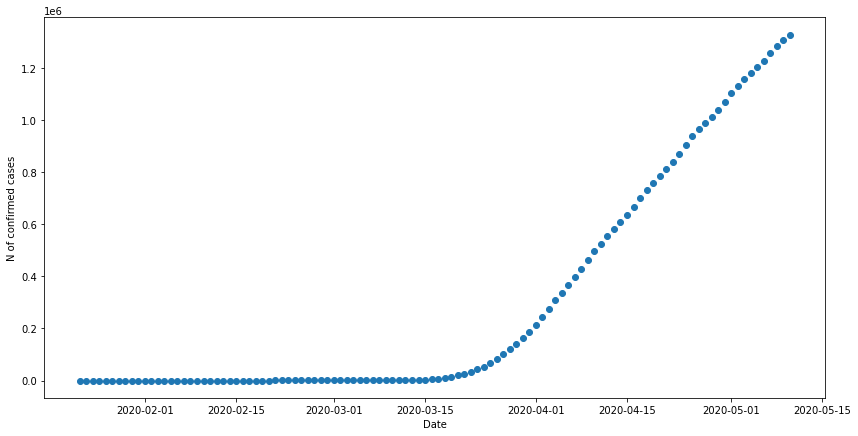

In [84]:
plt.figure(figsize=(14, 7))
plt.scatter(df_us['Date'], df_us['Confirmed'])
plt.xlabel('Date')
plt.ylabel('N of confirmed cases')
plt.show()

In [85]:
df_us['days'] = df_us.index - df_us.index[0]
start_date = date(2020, 1, 20)
#start_data = (df.Date = '2020-03-15')
df_us

Date  Confirmed  Deaths  Recovered  Daily Cases  Daily Deaths  \
0   2020-01-22          1       0          0          0.0           0.0   
1   2020-01-23          1       0          0          0.0           0.0   
2   2020-01-24          2       0          0          1.0           0.0   
3   2020-01-25          2       0          0          0.0           0.0   
4   2020-01-26          5       0          0          3.0           0.0   
..         ...        ...     ...        ...          ...           ...   
105 2020-05-06    1229331   73455     189910      24980.0        2391.0   
106 2020-05-07    1257023   75662     195036      27692.0        2207.0   
107 2020-05-08    1283929   77180     198993      26906.0        1518.0   
108 2020-05-09    1309550   78795     212534      25621.0        1615.0   
109 2020-05-10    1329260   79526     216169      19710.0         731.0   

     Daily Recovered  days  
0                0.0     0  
1                0.0     1  
2                0.0     2  
3                0.0     3  
4                0.0     4  
..               ...   ...  
105            119.0   105  
106           5126.0   106  
107           3957.0   107  
108          13541.0   108  
109           3635.0   109  

[110 rows x 8 columns]

In [86]:
from scipy.optimize import curve_fit

In [87]:
x_data = range(len(df_us.index))
y_data = df_us['Confirmed']

def log_curve(x, k, x_0, ymax):
    return ymax / (1 + np.exp(-k*(x-x_0)))

# Fit the curve
popt, pcov = curve_fit(log_curve, x_data, y_data, bounds=([0,0,0],np.inf), maxfev=20000)
estimated_k, estimated_x_0, ymax= popt


# Plot the fitted curve
k = estimated_k
x_0 = estimated_x_0
y_fitted = log_curve(x_data, k, x_0, ymax)
print(k, x_0, ymax)
#print(y_fitted)
y_data.tail()

0.10678073929745993 85.84832267099212 1373599.331738942


105    1229331
106    1257023
107    1283929
108    1309550
109    1329260
Name: Confirmed, dtype: int64

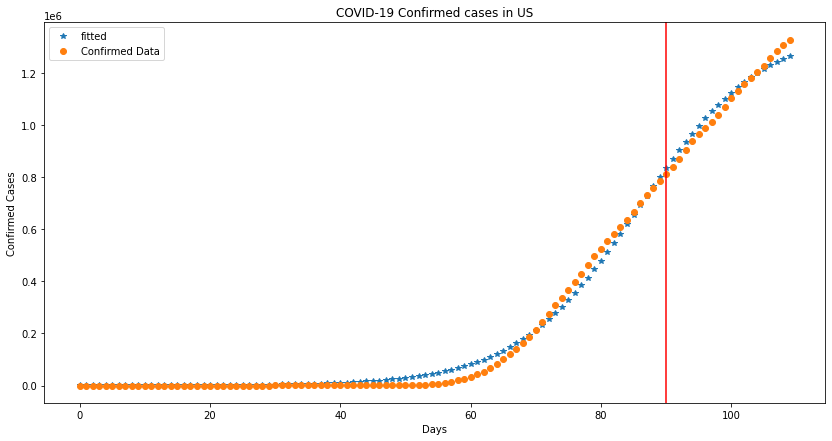

In [88]:
fig = plt.figure(figsize=(14, 7))
plt.plot(x_data,y_fitted,'*',label='fitted')
plt.plot(x_data,y_data,'o', label='Confirmed Data')
plt.axvline(90,ymin=0,ymax=1,color='red')
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.title('COVID-19 Confirmed cases in US')
plt.show()